<a href="https://colab.research.google.com/github/atikhasan007/-Natural-Language-Processing-with-spaCy-and-TextBlob/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load dataset**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**data load**

In [6]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [28]:
df = df.sample(n=5000, random_state=42).reset_index(drop=True)

In [29]:
df.head()

,review,sentiment,cleaned_text,encoded_sentiment
0,I really liked this Summerslam due to the look...,positive,really liked summerslam due look arena curtain...,1
1,Not many television shows appeal to quite as m...,positive,many television shows appeal quite many differ...,1
2,The film quickly gets to a major chase scene w...,negative,film quickly gets major chase scene ever incre...,0
3,Jane Austen would definitely approve of this o...,positive,jane austen would definitely approve onegwynet...,1
4,Expectations were somewhat high for me when I ...,negative,expectations somewhat high went see movie thou...,0


In [30]:
df['sentiment'].value_counts()

,count
sentiment,
positive,2519
negative,2481


**step 2 : preprocessing (Lowercasing, Removing Punctuation, tokenization)**

In [47]:
#preprocessing function


import re
import nltk
from nltk.corpus import stopwords

def preprocess_text(text):
    #convert to lowercase
    text = text.lower()

    #remove HTML tags
    text = re.sub(r'<.*?>','',text)

    #remove punctuation and number
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'\d+','',text)

    #remove storp words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])


    return text



In [48]:
#apply preprocessing
df['cleaned_text'] = df['review'].apply(preprocess_text)
df.head()

,review,sentiment,cleaned_text,encoded_sentiment
0,I really liked this Summerslam due to the look...,positive,really liked summerslam due look arena curtain...,1
1,Not many television shows appeal to quite as m...,positive,many television shows appeal quite many differ...,1
2,The film quickly gets to a major chase scene w...,negative,film quickly gets major chase scene ever incre...,0
3,Jane Austen would definitely approve of this o...,positive,jane austen would definitely approve onegwynet...,1
4,Expectations were somewhat high for me when I ...,negative,expectations somewhat high went see movie thou...,0


**2.1 Encoding**

In [49]:

from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the sentiment labels (positive -> 1, negative -> 0)
df['encoded_sentiment'] = label_encoder.fit_transform(df['sentiment'])


Tokenizatoin and padding

In [54]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer setup
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])

# Convert text to sequences (integer representation)
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])


In [55]:
print(f"Tokenizer word index:\n{tokenizer.word_index}")

Tokenizer word index:
{'<OOV>': 1, 'movie': 2, 'film': 3, 'one': 4, 'like': 5, 'good': 6, 'even': 7, 'would': 8, 'time': 9, 'really': 10, 'see': 11, 'story': 12, 'get': 13, 'much': 14, 'well': 15, 'people': 16, 'great': 17, 'first': 18, 'bad': 19, 'also': 20, 'films': 21, 'dont': 22, 'made': 23, 'make': 24, 'movies': 25, 'characters': 26, 'could': 27, 'way': 28, 'think': 29, 'many': 30, 'love': 31, 'watch': 32, 'two': 33, 'never': 34, 'character': 35, 'best': 36, 'seen': 37, 'acting': 38, 'little': 39, 'show': 40, 'plot': 41, 'life': 42, 'know': 43, 'better': 44, 'ever': 45, 'say': 46, 'man': 47, 'still': 48, 'end': 49, 'scene': 50, 'scenes': 51, 'something': 52, 'go': 53, 'actors': 54, 'im': 55, 'watching': 56, 'didnt': 57, 'thing': 58, 'work': 59, 'another': 60, 'doesnt': 61, 'back': 62, 'actually': 63, 'funny': 64, 'real': 65, 'years': 66, 'nothing': 67, 'though': 68, 'makes': 69, 'cant': 70, 'look': 71, 'director': 72, 'every': 73, 'lot': 74, 'part': 75, 'find': 76, 'new': 77, 'goi

In [56]:
sequence[0:3]

[[10,
  328,
  1,
  508,
  71,
  9345,
  1,
  71,
  401,
  114,
  172,
  4665,
  27,
  4,
  36,
  1,
  45,
  1,
  57,
  7638,
  1,
  199,
  1225,
  7024,
  9,
  628,
  467,
  1351,
  47,
  1564,
  448,
  47,
  55,
  998,
  117,
  1015,
  289,
  199,
  1225,
  5,
  73,
  958,
  1,
  289,
  4470,
  3394,
  6132,
  6133,
  1564,
  3957,
  1,
  9346,
  895,
  1564,
  1,
  1614,
  7639,
  4288,
  1564,
  1,
  1,
  1225,
  7639,
  630,
  97,
  528,
  529,
  2986,
  7025,
  1,
  1564,
  493,
  1,
  4471,
  18,
  197,
  1,
  197,
  1755,
  1,
  344,
  1,
  1,
  110,
  114,
  1,
  1,
  2043,
  4666,
  1,
  8389,
  412,
  1462,
  1,
  60,
  289,
  958,
  2688,
  1,
  1,
  412,
  5159,
  5159,
  1,
  1,
  7024,
  1,
  98,
  325,
  7638,
  1,
  958,
  253,
  289,
  196,
  111,
  904],
 [30,
  515,
  183,
  1195,
  84,
  30,
  158,
  2547,
  316,
  5,
  1,
  1,
  43,
  1,
  66,
  1,
  896,
  509,
  30,
  158,
  2607,
  29,
  5160,
  147,
  2044,
  802,
  146,
  109,
  73,
  40,
  147,
  35,
  2091,

In [57]:

max_len = max([len(seq) for seq in sequences])
max_len



582

In [59]:

# Pad the sequences
max_len = 582 # Max length of sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
padded_sequence[0:3]

array([[ 10, 328,   1, ...,   0,   0,   0],
       [ 30, 515, 183, ...,   0,   0,   0],
       [  3, 838, 102, ...,   0,   0,   0]], dtype=int32)

**step 4 : Train a simple RNN Model**

## Embedding : text -> vector
# LSTM: Sequence বুঝে context-aware representation তৈরি করে
#Dropout: Overfitting কমায়
#Dense: Final prediction দেয়
#Adam: মডেলটিকে train করতে সাহায্য করে smart gradient adjustment দিয়ে
# #মডেলের ওজন (weights) গুলো এমনভাবে পরিবর্তন করা যেন error ধীরে ধীরে কমে।

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# উদাহরণস্বরূপ একটি input length (max_len) সেট করে নিচ্ছি
max_len = 582  # তোমার ডেটার উপর নির্ভর করে এটা হবে

# Build the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_len),  # input_length বাদ দেওয়া ঠিক হবে (deprecated warning এড়াতে)
    SimpleRNN(128, activation='tanh', return_sequences=True),
    Dropout(0.5),
    SimpleRNN(64, activation='tanh'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary দেখতে চাইলে:
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_26 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_27 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [69]:
history = model.fit(padded_sequences, df['encoded_sentiment'], epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 656ms/step - accuracy: 0.4894 - loss: 0.8111 - val_accuracy: 0.4940 - val_loss: 0.6985
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 617ms/step - accuracy: 0.4745 - loss: 0.8163 - val_accuracy: 0.5120 - val_loss: 0.6927
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 618ms/step - accuracy: 0.4976 - loss: 0.7850 - val_accuracy: 0.5380 - val_loss: 0.6905
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 611ms/step - accuracy: 0.5133 - loss: 0.7528 - val_accuracy: 0.5090 - val_loss: 0.6933
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 631ms/step - accuracy: 0.5191 - loss: 0.7326 - val_accuracy: 0.4910 - val_loss: 0.6982
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 609ms/step - accuracy: 0.4959 - loss: 0.7436 - val_accuracy: 0.5070 - val_loss: 0.6941
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 612ms/step - accuracy: 0.4827 - loss: 0.7303 - val_accuracy: 0.4910 - val_loss: 0.6933
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 600ms/step - accuracy: 0.4932 - loss: 0.7178 - val_accu

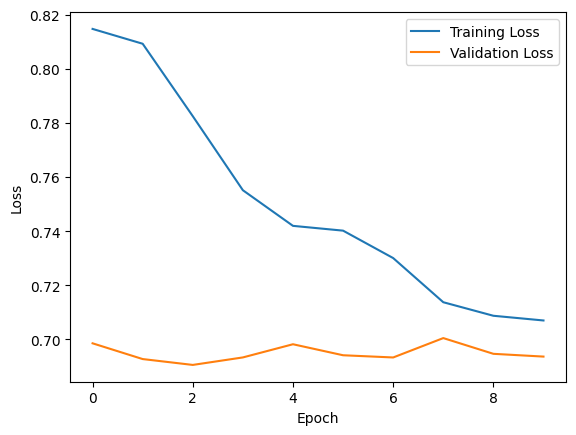

In [71]:
import matplotlib.pyplot as plt

#plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



**Step 6: Generate Classification Report and Confusion Matrix**

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

#predict the sentiment
y_pred = (model.predict(padded_sequences) > 0.5).astype("int32")

#confusion matrix
cm = confusion_matrix(df['encoded_sentiment'],y_pred)
print("Confusion Matrix:")
print(cm)

#classification report
print("Classification Report:")
print(classification_report(df['encoded_sentiment'],y_pred))


157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step
Confusion Matrix:
[[   5 2476]
 [   4 2515]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.00      0.00      2481
           1       0.50      1.00      0.67      2519

    accuracy                           0.50      5000
   macro avg       0.53      0.50      0.34      5000
weighted avg       0.53      0.50      0.34      5000



**Step 7: Save and Load the Model**

In [73]:
# Save the model
model.save('sentiment_rnn_model.h5')

# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('sentiment_rnn_model.h5')


**Step 8: Prediction System**

In [76]:

def predict_sentiment(sentence):
    # Preprocess the input sentence
    sentence = preprocess_text(sentence)

    # Tokenize and pad the sentence
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')

    # Predict sentiment
    prediction = loaded_model.predict(padded_sequence)
    if prediction > 0.5:
        return "Positive"
    else:
        return "Negative"

# Test the prediction system
test_sentence = "I love this product!"
print(f"Sentiment: {predict_sentiment(test_sentence)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Sentiment: Positive


In [77]:

# Test the prediction system
test_sentence = "I hate this movie!"
print(f"Sentiment: {predict_sentiment(test_sentence)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Sentiment: Positive


In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# উদাহরণস্বরূপ একটি input length (max_len) সেট করে নিচ্ছি
max_len = 582  # তোমার ডেটার উপর নির্ভর করে এটা হবে

# Build the model
model1 = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_len),  # input_length বাদ দেওয়া ঠিক হবে (deprecated warning এড়াতে)
    LSTM(128, activation='tanh', return_sequences=True),
    Dropout(0.5),
    LSTM(64, activation='tanh'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary দেখতে চাইলে:
model1.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [81]:
history1 = model1.fit(padded_sequences, df['encoded_sentiment'], epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.4874 - loss: 0.6945 - val_accuracy: 0.4910 - val_loss: 0.6941
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.5150 - loss: 0.6930 - val_accuracy: 0.5090 - val_loss: 0.6942
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.4852 - loss: 0.6959 - val_accuracy: 0.5090 - val_loss: 0.6930
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.5004 - loss: 0.6941 - val_accuracy: 0.4910 - val_loss: 0.6940
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5026 - loss: 0.6932 - val_accuracy: 0.5090 - val_loss: 0.6931
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.5130 - loss: 0.6932 - val_accuracy: 0.4910 - val_loss: 0.6931
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.4865 - loss: 0.6956 - val_accuracy: 0.4910 - val_loss: 0.6934
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.5008 - loss: 0.6931 - val_accuracy: 0.4910 - v

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam

# উদাহরণস্বরূপ একটি input length (max_len) সেট করে নিচ্ছি
max_len = 582  # তোমার ডেটার উপর নির্ভর করে এটা হবে

# Build the model
model2 = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_len),  # input_length বাদ দেওয়া ঠিক হবে (deprecated warning এড়াতে)
    GRU(128, activation='tanh', return_sequences=True),
    Dropout(0.5),
    GRU(64, activation='tanh'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary দেখতে চাইলে:
model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [85]:
history2 = model2.fit(padded_sequences, df['encoded_sentiment'], epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.5116 - loss: 0.6942 - val_accuracy: 0.4910 - val_loss: 0.6938
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.4960 - loss: 0.6944 - val_accuracy: 0.5090 - val_loss: 0.6930
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.5066 - loss: 0.6941 - val_accuracy: 0.5090 - val_loss: 0.6930
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5014 - loss: 0.6934 - val_accuracy: 0.5090 - val_loss: 0.6931
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.4952 - loss: 0.6947 - val_accuracy: 0.5090 - val_loss: 0.6930
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.4933 - loss: 0.6940 - val_accuracy: 0.4910 - val_loss: 0.6947
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.4945 - loss: 0.6946 - val_accuracy: 0.4910 - val_loss: 0.6941
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.5069 - loss: 0.6927 - val_accuracy: 0.4910 - v

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam

# উদাহরণস্বরূপ একটি input length (max_len) সেট করে নিচ্ছি
max_len = 582  # তোমার ডেটার উপর নির্ভর করে এটা হবে

# Build the model
model3 = Sequential([
    Embedding(input_dim=10000, output_dim=64),
    GRU(128, activation='tanh', return_sequences=True),
    Dropout(0.5),
    GRU(64, activation='tanh'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Compile the model
model3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary দেখতে চাইলে:
model3.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_24 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history3 = model3.fit(padded_sequences, df['encoded_sentiment'], epochs=10, batch_size=64, validation_split=0.2)
